# 02 &mdash; Python Libraries &mdash; practice


1. Load the *CDC's BRFSS* survey data into a pandas dataframe and generate a (non-random) sample by selecting the first 400 observations (*tip:* generate a new dataframe out of the slice). Make a scatterplot of weight (`weight`) vs desired weight (`wtdesire`)
    * Describe the statistical relationship betweeen the two variables

* The below joint plot has 3 parts. A histogram at top for ('weight'), a histogram at the right for ('wtdesire') and 
a scatter plot in the middle between ('weight') and ('wtdesire').
* It can be seen that there is more overlapping, thus relationship is postively linear
* There is some outlier also when the weight is higher mostly above 200 weight


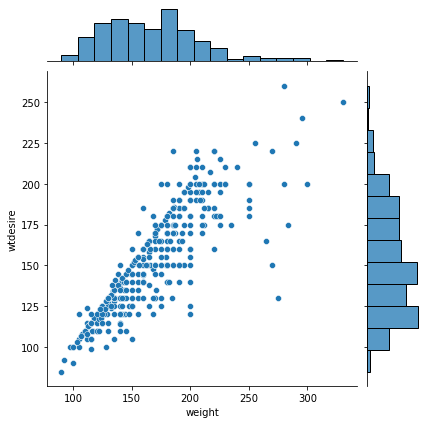

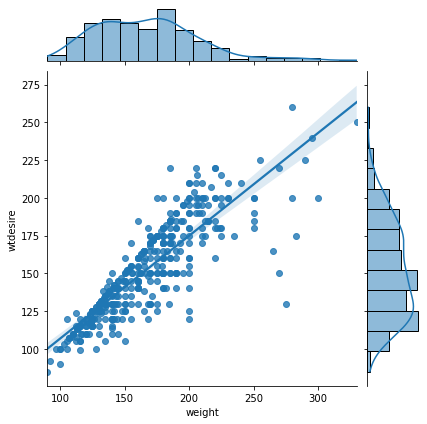

In [1]:
# code for exercise 1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("cdc.csv")
df_400 = df.iloc[0:400, 0:]
sns.jointplot(x="weight", y="wtdesire", data=df_400) # apply jointplot to weights and wtdesire
plt.show()

sns.jointplot(x="weight", y="wtdesire", data=df_400, kind='reg')
plt.show()

2. Add in your sample a new variable called `wdiff`, defined as the difference between desired weight and actual weight. Plot a frequency histogram for `wdiff` and report summary statistics
    * Describe what it means for `wdiff` to be equals to/below/above 0
    * What do the shape of the histogram and statistics tell us about how people feel about their weight?

* If wdiff = 0: The people has achieved the desired weight either they want to gain or loose the weight
* If wdiff < 0: The people has reduced too much weight then the desired weight they wanted to loose.
* If wdiff > 0: The people has still not achieved their desired weight. They are either near or far from achieving the desired weight.
* From the graph below, it can be seen that wdiff has more density between 0 to 50, thus it can be said that maximum people has achieved the desired weight or near to achieve the desired weight.

/Users/alpeshkumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


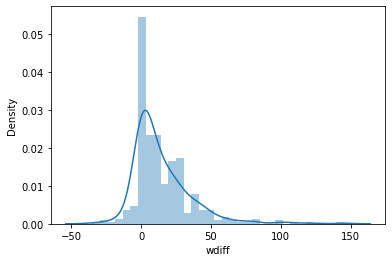

In [2]:
# code for exercise 2
wdiff = df_400.weight - df_400.wtdesire
df_400["wdiff"] = wdiff
sns.distplot(df_400.wdiff)
plt.show()

3. Using your sample, construct a contingency table for variables `gender` and `smoke100`
    * Compute the difference $P(smoke100=1 \mid gender=m) - P(smoke100=1 \mid gender=f)$

In [3]:
# code for exercise 3
smoke_gender = pd.crosstab(index=df_400.smoke100, columns=df_400.gender, normalize=True, margins=True)
print(smoke_gender)
sgm = smoke_gender.iloc[1]['m'] / smoke_gender.iloc[2]['m']
sgf = smoke_gender.iloc[1]['f'] / smoke_gender.iloc[2]['f']
print("\n𝑃(𝑠𝑚𝑜𝑘𝑒100=1∣𝑔𝑒𝑛𝑑𝑒𝑟=𝑚)−𝑃(𝑠𝑚𝑜𝑘𝑒100=1∣𝑔𝑒𝑛𝑑𝑒𝑟=𝑓): %s" %(sgm - sgf))

gender         f       m    All
smoke100                       
0         0.2975  0.2375  0.535
1         0.2325  0.2325  0.465
All       0.5300  0.4700  1.000

𝑃(𝑠𝑚𝑜𝑘𝑒100=1∣𝑔𝑒𝑛𝑑𝑒𝑟=𝑚)−𝑃(𝑠𝑚𝑜𝑘𝑒100=1∣𝑔𝑒𝑛𝑑𝑒𝑟=𝑓): 0.05600160578081098


4. Recall the CPU benchmarks example of Chapter 03, part 6, where the multi-core (MC) processor ratings in the market follow the distribution $\mathcal{N}(90000,10000^2)$. Denote with $X$ the corresponding random variable. Assume two new processors *CPU_l* (lower-end) and *CPU_h* (higher-end) are launched into the market, and that they obtain ratings $X_l=100000$ and $X_h=120000$, respectively. 
    * Compute the z scores for $X_l$ and $X_h$ 
    * Compute the probabilities that 
        * A pre-existing MC processor performs better than *CPU_h* (i.e., $P(X > X_h)$)
        * A pre-existing MC processor performs in-between *CPU_l* and *CPU_h*


In [4]:
# code for exercise 4
import numpy as np
from scipy import stats

# solution tips
mu = 90000
stdev = 10000
X_l = 100000
X_h = 120000

def z_score(X, mu, stdev):
    z_score = (X-mu)/stdev
    return z_score

Z_l = z_score(X_l, mu, stdev)
Z_h = z_score(X_h, mu, stdev)

print('Z score of X_l: %s' %Z_l)
print('Z score of X_l: %s' %Z_h)

X_h_cdf = stats.norm(loc=mu, scale=stdev).cdf(X_h)
print('\nP(X > X_h): %s' % (1- X_h_cdf))

X_l_cdf = stats.norm(loc=mu, scale=stdev).cdf(X_l)
print('\nP(X_l <= X <= X_h): %s' % (X_h_cdf - X_l_cdf))

Z score of X_l: 1.0
Z score of X_l: 3.0

P(X > X_h): 0.0013498980316301035

P(X_l <= X <= X_h): 0.15730535589982697


5. What's the expected value and variance of the volume of a sphere with random radius $\sim \mathcal{N}(0.5,0.1^2)$ cm?

In [5]:
# code for exercise 5

import numpy as np
from scipy import stats

mu = 0.5
stdev = 0.1
norm = stats.norm(loc=mu, scale=stdev)

e_x = lambda r: (4/3)*np.pi*r**3
expected_e_x = norm.expect(e_x)

e_x_2 = lambda r: ((4/3)*np.pi*r**3)**2
expected_e_x_2 = norm.expect(e_x_2)

print("Expected Value: ", expected_e_x)
print("Variance: ", (expected_e_x_2 - expected_e_x**2))

Expected Value:  0.5864306286700947
Variance:  0.11475060050333225
